## Analysis of Healthcare Stroke Data

In [1]:
# Importing Data Science Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Reading Csv file
My_data = pd.read_csv('train_2v.csv') 
My_data_copy = My_data.copy()
My_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Exploratory Data Analysis

In [3]:
# Shape of dataframe
My_data.shape

(43400, 12)

In [4]:
# Datatypes of columns in dataset
My_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Looking at our Numerical columns 'hypertension', 'heart_disease', 'stroke' are binary having 0's' and 1's'

In [5]:
# Statistics of numerical columns
My_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
# Statistics of categorical features
My_data.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,30108
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,16053


### Handling Missing Values
Missing values are a major concern with data analysis and dealing them is another hurdle. Python treats missing data as NaN but does not include it into calcualtions and visulizations. Also predictive models cannot be built without treating missing values. In our case missing values occurs in bmi and smoking_status fields.

### Imputing Missing Values 
Firstly, 'age_group' column is determined by considering age of patients in buckets of 10. Now, the missing values in 'bmi' are imputed using specific average values of 'bmi' column grouped by columns 'gender' and 'age_group'. Next, the missing values in 'smoking_status' are imputed by using category 'never smoked' for patients below the age of 18, and a new category 'no information' is used to replace remaining NaN values in 'smoking_status'.

In [7]:
# Checking for missing values using isnull() method
My_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [8]:
My_data['age_group'] = np.ceil(My_data['age']/10).astype(int)

In [9]:
My_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,1
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,6
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,7
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,2


In [10]:
# Using pivot table to find average bmi of patients grouped by gender and age_group
pt = pd.pivot_table(My_data, index=["age_group","gender"], values="bmi", aggfunc=np.mean)

In [11]:
pt

bmi
age_group gender           
1         Female  18.697910
          Male    19.025108
          Other   21.200000
2         Female  25.205676
          Male    24.742319
          Other   25.150000
3         Female  28.703383
          Male    28.734862
          Other   22.400000
4         Female  30.445502
          Male    31.079198
          Other   32.000000
5         Female  30.785937
          Male    31.824418
          Other   37.200000
6         Female  31.443917
          Male    31.493896
          Other   32.200000
7         Female  31.107237
          Male    31.207986
8         Female  28.935980
          Male    29.287068
9         Female  27.623938
          Male    27.478698

In [12]:
pt.loc[6, 'Other']

bmi    32.2
Name: (6, Other), dtype: float64

In [13]:
%%time
# Using above averages to impute the missing values in bmi
for i in range(len(My_data)):
    if math.isnan(My_data.bmi[i]):
        ag = My_data.age_group[i]
        gen = My_data.gender[i]

        My_data.bmi[i] = pt.loc[ag, gen]

C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Wall time: 52 s


In [14]:
# Check
My_data.bmi[407]

31.443917147351872

In [15]:
# Verifying that average bmi of patients grouped by gender and age_group stays the same as previous pivot table
pd.pivot_table(My_data, index=["age_group","gender"], values="bmi", aggfunc=np.mean)

bmi
age_group gender           
1         Female  18.697910
          Male    19.025108
          Other   21.200000
2         Female  25.205676
          Male    24.742319
          Other   25.150000
3         Female  28.703383
          Male    28.734862
          Other   22.400000
4         Female  30.445502
          Male    31.079198
          Other   32.000000
5         Female  30.785937
          Male    31.824418
          Other   37.200000
6         Female  31.443917
          Male    31.493896
          Other   32.200000
7         Female  31.107237
          Male    31.207986
8         Female  28.935980
          Male    29.287068
9         Female  27.623938
          Male    27.478698

In [16]:
%%time
# Imputing missing values in smoking_status
My_data.replace(np.nan, '', regex=True, inplace=True)

for i in range(len(My_data)):
    if My_data.smoking_status[i] == '':
        if My_data.age[i] <= 18: 
            My_data.smoking_status[i] = 'never smoked'
        else:
            My_data.smoking_status[i] = 'no information'

C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Wall time: 6min 53s


In [17]:
My_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,6
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,7
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,2


In [18]:
# Looks like all missing values have been imputed
My_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

In [19]:
My_data.drop(['age_group'],axis = 1, inplace=True)

In [20]:
My_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


### Correlation
Correlation is used to determine the relationship between two variables/ fields. Correlation varies from -1 to 1; if the Correlation is 1 then the fields are positively correlated, 0 having no correlation and -1 is negatively correlated. Lets see how each atttribute correlates with one another using Heatmap. Looks like there is not much of a correlation among variables. But we see that 'age' has some positive Correlation with most of the other fields.

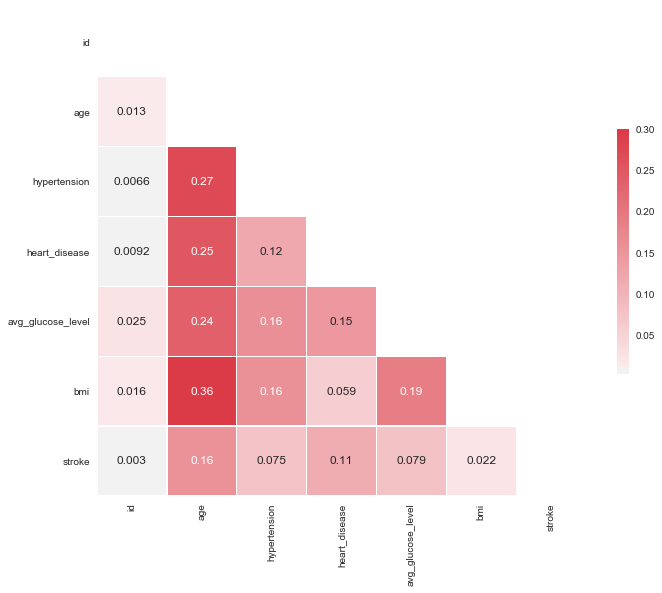

In [22]:
# Setting up correlation for our dataframe and passing it to seaborn heatmap function
import seaborn as sns

sns.set(style="white")
corr = My_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Outlier Analysis
An Outlier is usually an observation which typically lies farthest from the mean. According to Statistical theory if any observation is 3*IQR(Inter Quartile Range) from the mean then its called an Outlier. Sometimes values are distributed randomly such as a 'bmi' - from our boxplot below looks like more values have crossed the whisker.

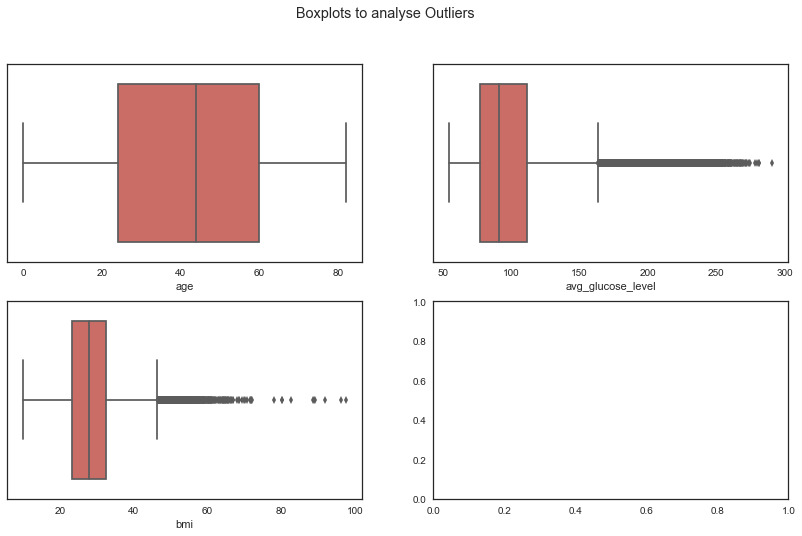

In [23]:
# Plotting some numerical feature as a Boxplot using Seaborn
import seaborn as sns
f, axes = plt.subplots(2, 2, figsize=(14,8))
f.suptitle('Boxplots to analyse Outliers')
sns.boxplot(x='age', data=My_data, palette='hls', ax=axes[0][0])
sns.boxplot(x='avg_glucose_level', data=My_data, palette='hls', ax=axes[0][1])
sns.boxplot(x='bmi', data=My_data, palette='hls', ax=axes[1][0])
# sns.boxplot(x='hypertension', data=My_data, palette='hls', ax=axes[1][1]) 

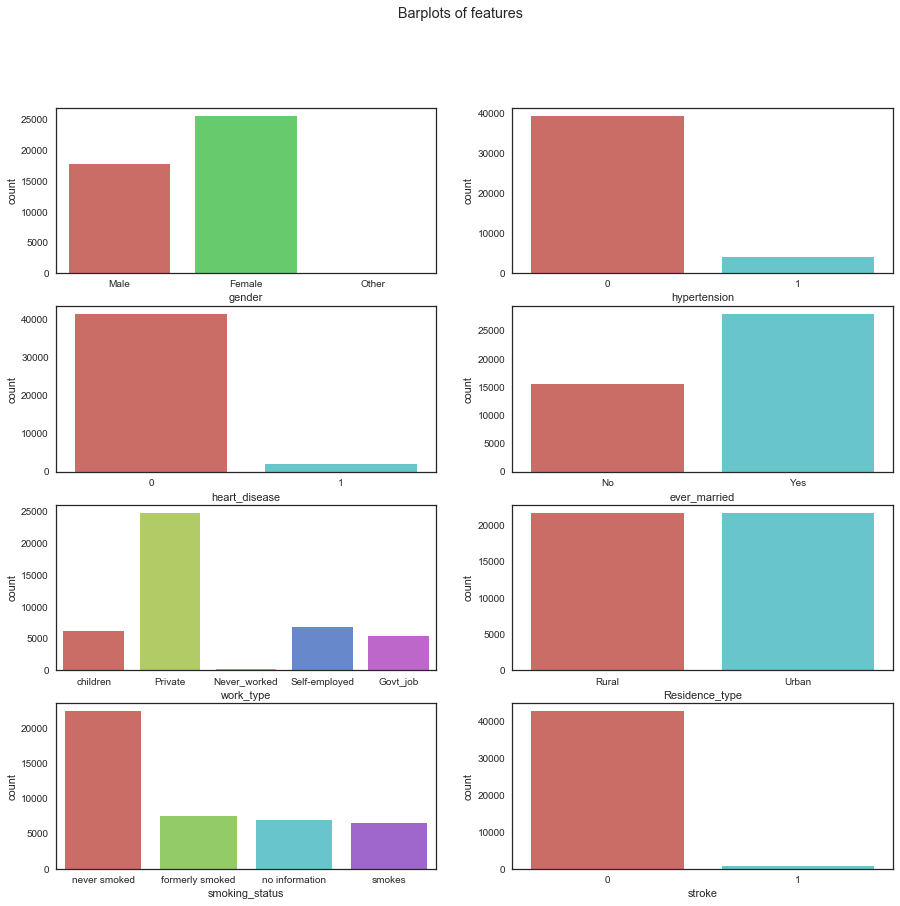

In [24]:
# Barplots of features
fig, axes = plt.subplots(4, 2, figsize=(15,14))
fig.suptitle('Barplots of features')
sns.countplot(x='gender', data=My_data, palette='hls', ax=axes[0][0])
sns.countplot(x='hypertension', data=My_data, palette='hls', ax=axes[0][1])
sns.countplot(x='heart_disease', data=My_data, palette='hls', ax=axes[1][0])
sns.countplot(x='ever_married', data=My_data, palette='hls', ax=axes[1][1])
sns.countplot(x='work_type', data=My_data, palette='hls', ax=axes[2][0])
sns.countplot(x='Residence_type', data=My_data, palette='hls', ax=axes[2][1])
sns.countplot(x='smoking_status', data=My_data, palette='hls', ax=axes[3][0])
sns.countplot(x='stroke', data=My_data, palette='hls', ax=axes[3][1])

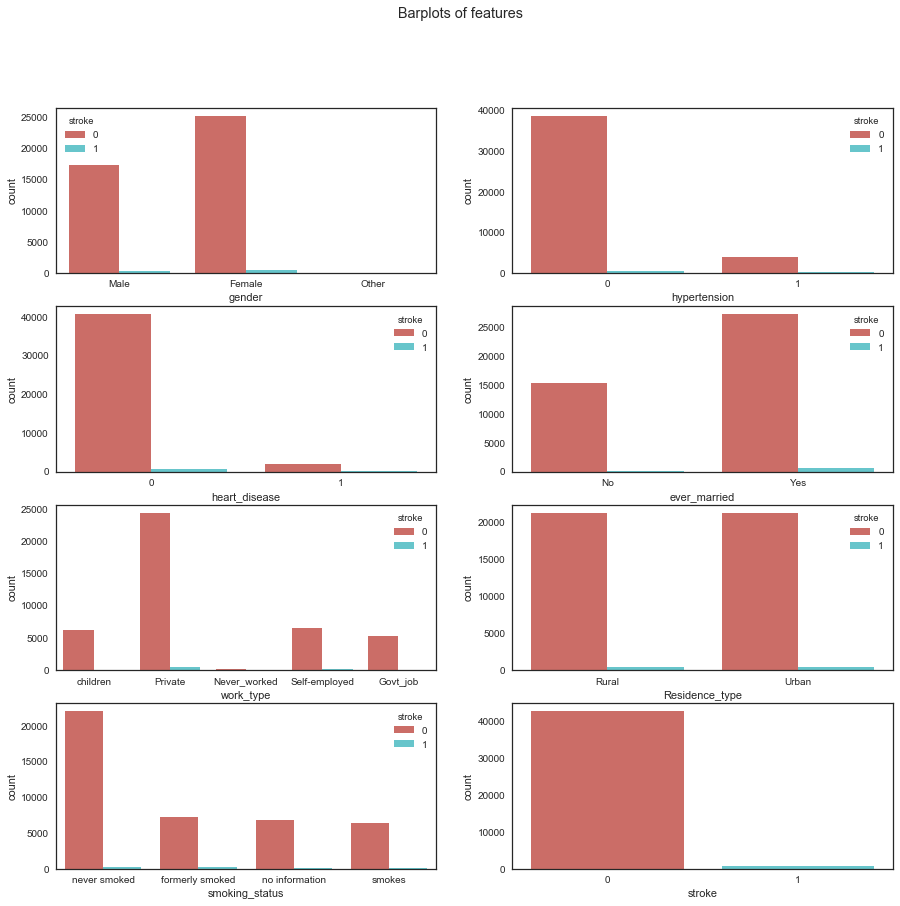

In [25]:
# Barplots of features
fig, ax = plt.subplots(4, 2, figsize=(15,14))
ax1,ax2,ax3,ax4, ax5, ax6, ax7, ax8 = ax.flatten()
fig.suptitle('Barplots of features')
sns.countplot(x='gender', hue='stroke', data=My_data, palette='hls', ax=ax1)
sns.countplot(x='hypertension', hue='stroke', data=My_data, palette='hls', ax=ax2)
sns.countplot(x='heart_disease', hue='stroke', data=My_data, palette='hls', ax=ax3)
sns.countplot(x='ever_married', hue='stroke', data=My_data, palette='hls', ax=ax4)
sns.countplot(x='work_type', hue='stroke', data=My_data, palette='hls', ax=ax5)
sns.countplot(x='Residence_type', hue='stroke', data=My_data, palette='hls', ax=ax6)
sns.countplot(x='smoking_status', hue='stroke', data=My_data, palette='hls', ax=ax7)
sns.countplot(x='stroke', data=My_data, palette='hls', ax=ax8)

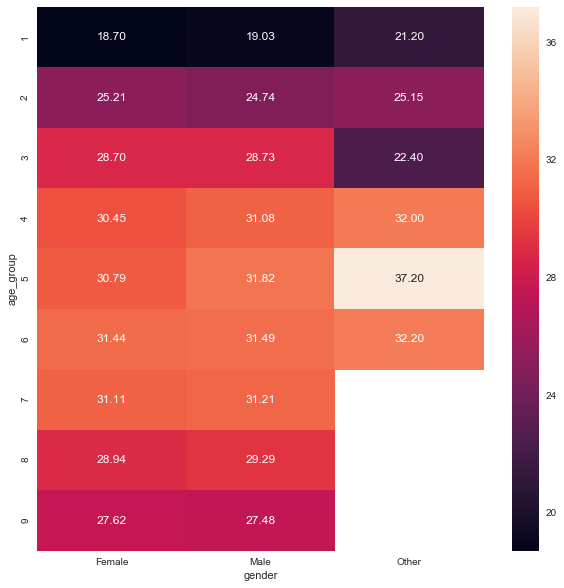

In [27]:
# Heatmap of BMI by age group and gender
My_data_copy2 = My_data.copy()
My_data_copy2['age_group'] = np.ceil(My_data_copy2['age']/10).astype(int)
plt.figure(figsize=(10,10))
sns.heatmap(My_data_copy2.groupby(['age_group', 'gender']).bmi.mean().unstack(), annot=True, fmt=".2f")

In [28]:
df_train = My_data.copy()

### Encoding of Categorical features
Categorical variables can also paricipate in model building provided that they get encoded inorder to be included.

1] Categorical variables (with 2 categories): 'ever_married' and 'Residence_type' are encoded using Label Encoding, where one category is assigned as 0 and other is assigned as 1.

2] Categorical variables (with more than 2 categories): 'gender', 'work_type' and 'smoking_status' are encoded using One Hot Encoding by creating dummy column for every category. Well, we would have more columns included to our dataframe by this procedure.

Tip: in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like shown below:

cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

In [29]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting ever_married into numbers: 1-Yes, 0-No
df_train['ever_married_encoded']=le.fit_transform(df_train.ever_married)

# Converting Residence_type into numbers: 1-Urban, 0-Rural
df_train['Residence_type_encoded']=le.fit_transform(df_train.Residence_type)

df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_encoded,Residence_type_encoded
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1,1
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,0,0


In [30]:
df_train['ever_married_encoded'].value_counts()

1    27938
0    15462
Name: ever_married_encoded, dtype: int64

In [31]:
# Dropping the categorical columns which have been Label encoded
df_train.drop(['ever_married','Residence_type'],axis = 1, inplace=True)

In [32]:
df_train.head()

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_encoded,Residence_type_encoded
0,30669,Male,3.0,0,0,children,95.12,18.0,never smoked,0,0,0
1,30468,Male,58.0,1,0,Private,87.96,39.2,never smoked,0,1,1
2,16523,Female,8.0,0,0,Private,110.89,17.6,never smoked,0,0,1
3,56543,Female,70.0,0,0,Private,69.04,35.9,formerly smoked,0,1,0
4,46136,Male,14.0,0,0,Never_worked,161.28,19.1,never smoked,0,0,0


In [33]:
# Get one hot encoding of columns gender, work_type, smoking_status
# Using get_dummies function to assign binary values to each value in the categorical column
df_train_one_hot = pd.get_dummies(df_train)
df_train_one_hot.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_encoded,Residence_type_encoded,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,30468,58.0,1,0,87.96,39.2,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,16523,8.0,0,0,110.89,17.6,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
4,46136,14.0,0,0,161.28,19.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [34]:
# The dataframe has some new additions resulting from the categorical dummies added
df_train_one_hot.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'ever_married_encoded', 'Residence_type_encoded',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_no information', 'smoking_status_smokes'],
      dtype='object')

In [35]:
# Moving target column 'stroke' to last position
stroke = df_train_one_hot['stroke']
df_train_one_hot.drop(labels=['stroke'], axis=1,inplace = True)
df_train_one_hot['stroke']=stroke
df_train_one_hot.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes,stroke
0,30669,3.0,0,0,95.12,18.0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,30468,58.0,1,0,87.96,39.2,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,16523,8.0,0,0,110.89,17.6,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,56543,70.0,0,0,69.04,35.9,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,46136,14.0,0,0,161.28,19.1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [36]:
df_train_final = df_train_one_hot.copy()
# Defining features and target
features = df_train_final.columns[1:-1] # Remove 'id' and 'stroke' columns
X = df_train_final[features] # Features
y = df_train_final['stroke'] # Target

In [37]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,58.0,1,0,87.96,39.2,1,1,0,1,0,0,0,1,0,0,0,1,0,0
2,8.0,0,0,110.89,17.6,0,1,1,0,0,0,0,1,0,0,0,1,0,0
3,70.0,0,0,69.04,35.9,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,14.0,0,0,161.28,19.1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


### Feature Selection: Random Forest Regressor

In [38]:
%%time
# Feature Selection using Random Forest Regressor
# fit an Extra Trees model to the data
from sklearn.ensemble import RandomForestRegressor
# cols_predictors = X.columns
model = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[1.39699723e-01 2.22638374e-02 1.23695573e-02 3.79860689e-01
 2.45654431e-01 1.55570640e-02 2.98036562e-02 1.69319426e-02
 1.66062887e-02 0.00000000e+00 1.28714411e-02 1.70775341e-06
 1.89164048e-02 1.91129953e-02 4.47660937e-05 1.78358640e-02
 1.79880953e-02 1.78633675e-02 1.66181690e-02]
Wall time: 1min 6s


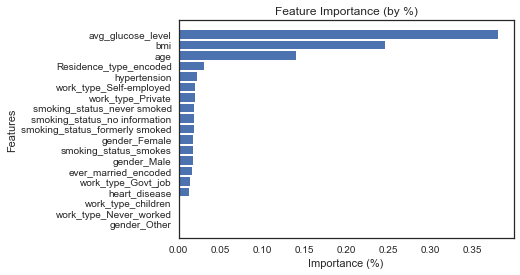

In [39]:
# Plotting
feat_imps = model.feature_importances_
names = X.columns
indices = np.argsort(feat_imps)
feat_imps, names = zip(*sorted(zip(feat_imps, names)))
plt.barh(range(len(names)), feat_imps, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance (by %)')
plt.show()
# for f in range(X.shape[1]):
#     print("%2d) %-*s %f" % (f+1, 10, names[f], feat_imps[f]))
# fi = pd.DataFrame.from_dict({'feat':X.columns,'imp':feat_imps})
# fi.set_index('feat',inplace=True,drop=True)
# fi = fi.sort_values('imp',ascending=False)
# fi.plot.bar()

In [40]:
# Dropping insignificant predictors
X_rfr = X.copy()
X_rfr.drop(['work_type_children', 'work_type_Never_worked', 'gender_Other'], axis=1, inplace=True)
X_rfr.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,0,1,0,0,0,0,1,0,0
1,58.0,1,0,87.96,39.2,1,1,0,1,0,1,0,0,1,0,0
2,8.0,0,0,110.89,17.6,0,1,1,0,0,1,0,0,1,0,0
3,70.0,0,0,69.04,35.9,1,0,1,0,0,1,0,1,0,0,0
4,14.0,0,0,161.28,19.1,0,0,0,1,0,0,0,0,1,0,0


In [41]:
df_updated = X_rfr.copy()
df_updated['stroke'] = y
df_updated.to_csv('Updated_train.csv', index=False)

In [42]:
df_updated = pd.read_csv('Updated_train.csv')
df_updated.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes,stroke
0,3.0,0,0,95.12,18.0,0,0,0,1,0,0,0,0,1,0,0,0
1,58.0,1,0,87.96,39.2,1,1,0,1,0,1,0,0,1,0,0,0
2,8.0,0,0,110.89,17.6,0,1,1,0,0,1,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,1,0,1,0,0,1,0,1,0,0,0,0
4,14.0,0,0,161.28,19.1,0,0,0,1,0,0,0,0,1,0,0,0


In [43]:
# Defining features and target
features = df_updated.columns[:-1] # Remove 'stroke' columns
X_rfr = df_updated[features] # Features
y = df_updated['stroke'] # Target
X_rfr.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,0,1,0,0,0,0,1,0,0
1,58.0,1,0,87.96,39.2,1,1,0,1,0,1,0,0,1,0,0
2,8.0,0,0,110.89,17.6,0,1,1,0,0,1,0,0,1,0,0
3,70.0,0,0,69.04,35.9,1,0,1,0,0,1,0,1,0,0,0
4,14.0,0,0,161.28,19.1,0,0,0,1,0,0,0,0,1,0,0


### Feature Extraction: PCA

It is important that we scale the features before performing PCA. Data on which the PCA transformation is calculated should be normalized with mean 0 and variance 1. Thus, I use sklearn's StandardScalar method to perform feature scaling.

In [44]:
X=X_rfr.copy()

In [45]:
# Feature Scaling (Normalization): Performing z-score normalization of numerical features using StandardScaler()
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_norm = std_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.keys().tolist()
X_norm.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,-1.741517,-0.321296,-0.223342,-0.217176,-1.389205,-1.344203,-1.002584,-1.202971,1.203602,-0.378561,-1.156549,-0.430773,-0.456813,0.969855,-0.437819,-0.422056
1,0.700823,3.112398,-0.223342,-0.383258,1.378612,0.743935,0.997423,-1.202971,1.203602,-0.378561,0.864641,-0.430773,-0.456813,0.969855,-0.437819,-0.422056
2,-1.519486,-0.321296,-0.223342,0.148621,-1.441428,-1.344203,0.997423,0.831275,-0.830840,-0.378561,0.864641,-0.430773,-0.456813,0.969855,-0.437819,-0.422056
3,1.233697,-0.321296,-0.223342,-0.822123,0.947772,0.743935,-1.002584,0.831275,-0.830840,-0.378561,0.864641,-0.430773,2.189080,-1.031082,-0.437819,-0.422056
4,-1.253049,-0.321296,-0.223342,1.317458,-1.245591,-1.344203,-1.002584,-1.202971,1.203602,-0.378561,-1.156549,-0.430773,-0.456813,0.969855,-0.437819,-0.422056


In [46]:
# PCA application
from sklearn import decomposition
pca = decomposition.PCA(n_components=len(X_norm.columns))
X_norm_pca = pca.fit_transform(X_norm)
X_norm_pca = pd.DataFrame(X_norm_pca)
ev = pca.explained_variance_ratio_  # how much variance is explained by the components that were formed
cumsum_ev = pca.explained_variance_ratio_.cumsum() # cummulative explained variance

# number of PCs that explain 90% variance
num_pc = np.where(cumsum_ev==cumsum_ev[cumsum_ev>0.9][0])[0][0]+1
print('No. of PCs that explain 90% of the variance in the data =', num_pc)

No. of PCs that explain 90% of the variance in the data = 11


In [47]:
# X_norm_pca_final = X_norm_pca.iloc[:,0:num_pc].copy()
pca = decomposition.PCA(n_components=num_pc)
X_norm_pca = pca.fit_transform(X_norm)
X_norm_pca = pd.DataFrame(X_norm_pca)

pca_cols = [] # create new names for PCs returned
for i in range(num_pc):
    col = "pc%d" % (i+1)
    pca_cols += [col]
X_norm_pca.columns = pca_cols
X_norm_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-2.900366,1.949582,0.481194,-0.013308,-0.173201,0.088938,-0.184352,1.011257,0.316121,0.271521,0.168584
1,1.104528,1.406668,-0.535788,2.170869,0.296998,-1.133322,1.225710,-0.973633,-1.266807,-0.246193,2.298499
2,-2.588788,-1.087176,-0.539278,0.661966,-0.070608,0.103615,-0.237694,-0.956638,0.847011,0.400920,0.089258
3,1.756278,-1.361327,-0.925219,0.249272,-0.666725,2.237581,0.070956,0.916444,-0.730850,-0.636826,-0.113226
4,-2.279986,1.989155,0.647742,0.492600,-0.038269,-0.190917,0.079166,1.040307,0.733190,1.246088,-0.448275


In [48]:
X_df = X_norm.copy()

### Train Test Split

The Train Test Split is usually done to evaluate our model by Training it on the known output (labeled data) so that the model can learn on it and Testing using unlabeled data so that the predictive accuracy of the model can be determined.

In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, 
                                                    test_size=0.3, 
                                                    random_state=10) # random_state = 10 is the random seed

C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Modeling: Logistic Regression

In [50]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.grid_search import GridSearchCV

In [52]:
%%time
# Grid Search
logreg = linear_model.LogisticRegression(class_weight='balanced') # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X_df,y)
print('Best roc_auc: {:.6}, with best C: {}'.format(clf.best_score_, clf.best_params_))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best roc_auc: 0.85059, with best C: {'C': 0.005}
Wall time: 47.8 s


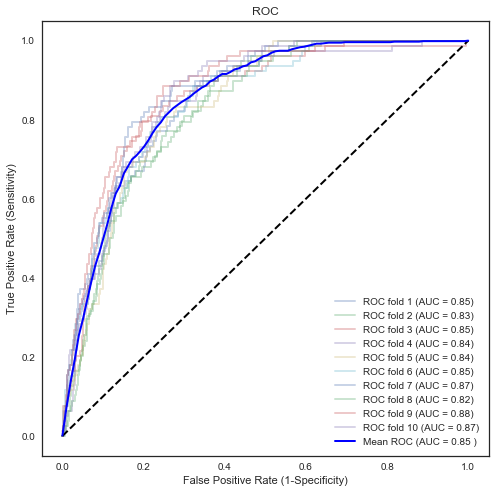

Wall time: 2.72 s


In [53]:
%%time
import matplotlib.patches as patches
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold

clf_lr = linear_model.LogisticRegression(C=0.005, class_weight='balanced')
cv = StratifiedKFold(n_splits=10,shuffle=False)

conf_mat_lr = np.zeros((2,2)) # Initializing the Confusion Matrix

# plot arrows
fig1 = plt.figure(figsize=[8,8])
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_df,y):
#     print('{} of KFold {}'.format(i,cv.n_splits))
    xtr_lr,xvl_lr = X_df.loc[train], X_df.loc[test]
    ytr_lr,yvl_lr = y.loc[train],y.loc[test]
    
    prediction_lr = clf_lr.fit(xtr_lr,ytr_lr).predict_proba(xvl_lr)
    y_pred_lr = clf_lr.predict(xvl_lr)
    fpr_lr, tpr_lr, t_lr = roc_curve(yvl_lr, prediction_lr[:, 1]) # y_pred_lr; prediction_lr[:, 1]
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    plt.plot(fpr_lr, tpr_lr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_lr))
    i= i+1

#     print('ROC AUC score:',roc_auc_lr)
    
    # Compute confusion matrix
    cm = confusion_matrix(yvl_lr,y_pred_lr)
    conf_mat_lr = conf_mat_lr + cm
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
plt.plot(mean_fpr_lr, mean_tpr_lr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc_lr),lw=2, alpha=1)

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [54]:
print('Sum of 10 Confusion Matrices\n',conf_mat_lr)
print('AUC',aucs_lr,'\nMean AUC Score',np.mean(aucs_lr))
# Print precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(yvl_lr,clf_lr.predict(xvl_lr)))

Sum of 10 Confusion Matrices
 [[31118. 11499.]
 [  134.   649.]]
AUC [0.8500911796327866, 0.8338689270503538, 0.8523721554627589, 0.843467614819093, 0.8376980832400823, 0.8475255387503159, 0.8703660253402159, 0.824258781193773, 0.8781584917468513, 0.8680970519740762] 
Mean AUC Score 0.8505903849210308
             precision    recall  f1-score   support

          0       1.00      0.73      0.85      4261
          1       0.06      0.88      0.11        78

avg / total       0.98      0.74      0.83      4339



### Modeling: kNN

In [57]:
%%time
# Grid Search: kNN
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(10)+1 # Defining the k values
weight_options = ['uniform', 'distance'] # Defining weight options
parameters = dict(n_neighbors=k_range, weights=weight_options) # Creating a parameter grid

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,scoring='roc_auc',refit=True,cv=10)
grid.fit(X_df,y)
print('Best roc_auc: {:.6}, with best parameters: {}'.format(grid.best_score_, grid.best_params_))

In [58]:
# view the complete results
grid.grid_scores_

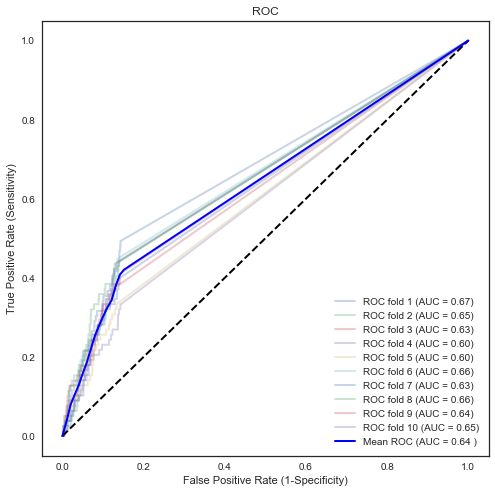

Wall time: 45.8 s


In [59]:
%%time
clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance') 
cv = StratifiedKFold(n_splits=10,shuffle=False)

conf_mat_knn = np.zeros((2,2)) # Initializing the Confusion Matrix

# plot arrows
fig1 = plt.figure(figsize=[8,8])
tprs_knn = []
aucs_knn = []
mean_fpr_knn = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_df,y):
#     print('{} of KFold {}'.format(i,cv.n_splits))
    xtr_knn,xvl_knn = X_df.loc[train], X_df.loc[test]
    ytr_knn,yvl_knn = y.loc[train],y.loc[test]
    
    prediction_knn = clf_knn.fit(xtr_knn,ytr_knn).predict_proba(xvl_knn)
    y_pred_knn = clf_knn.predict(xvl_knn)
    fpr_knn, tpr_knn, t_knn = roc_curve(yvl_knn, prediction_knn[:, 1]) # y_pred_knn; prediction_knn[:, 1]
    tprs_knn.append(interp(mean_fpr_knn, fpr_knn, tpr_knn))
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    aucs_knn.append(roc_auc_knn)
    plt.plot(fpr_knn, tpr_knn, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_knn))
    i= i+1

#     print('ROC AUC score:',roc_auc_knn)
    
    # Compute confusion matrix
    cm = confusion_matrix(yvl_knn,y_pred_knn)
    conf_mat_knn = conf_mat_knn + cm
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_knn = np.mean(tprs_knn, axis=0)
mean_auc_knn = auc(mean_fpr_knn, mean_tpr_knn)
plt.plot(mean_fpr_knn, mean_tpr_knn, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc_knn),lw=2, alpha=1)

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [60]:
print('Sum of 10 Confusion Matrices\n',conf_mat_knn)
print('AUC',aucs_knn,'\nMean AUC Score',np.mean(aucs_knn))
# Print precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(yvl_knn,clf_knn.predict(xvl_knn)))

Sum of 10 Confusion Matrices
 [[4.2598e+04 1.9000e+01]
 [7.8300e+02 0.0000e+00]]
AUC [0.6736303749948025, 0.6495939981823474, 0.6257135474520192, 0.5959613278946925, 0.6000312842171125, 0.6568377071075335, 0.6281855755694329, 0.6556123216531572, 0.6363439423753904, 0.650091166753922] 
Mean AUC Score 0.637200124620041
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4261
          1       0.00      0.00      0.00        78

avg / total       0.96      0.98      0.97      4339



### Modeling: SVM

In [61]:
%%time
# Grid Search: SVM
from sklearn.svm import SVC
# parameter_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
parameter_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10]},
                    {'kernel': ['linear'], 'C': [1, 10]}]

svc = SVC()
grid = GridSearchCV(svc,parameter_grid,scoring='roc_auc',refit=True,cv=10)
grid.fit(X_df,y)
print('Best roc_auc: {:.6}, with best parameters: {}'.format(grid.best_score_, grid.best_params_))

In [62]:
# view the complete results
grid.grid_scores_

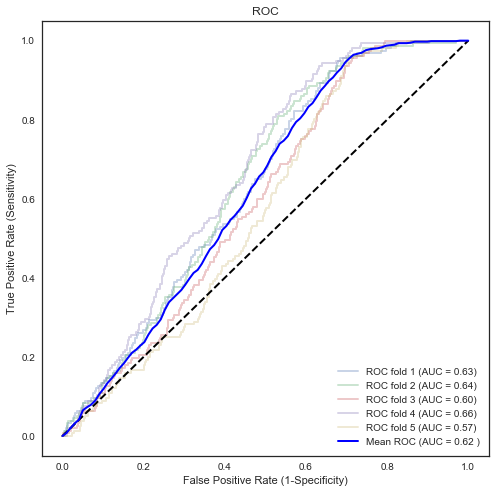

Wall time: 3min 13s


In [64]:
%%time
clf_svc = SVC(kernel='rbf', gamma=0.001, C=10)
clf_svc.probability = True  ## Use this line only for SVM
cv = StratifiedKFold(n_splits=5,shuffle=False)

conf_mat_svc = np.zeros((2,2)) # Initializing the Confusion Matrix

# plot arrows
fig1 = plt.figure(figsize=[8,8])
tprs_svc = []
aucs_svc = []
mean_fpr_svc = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_df,y):
#     print('{} of KFold {}'.format(i,cv.n_splits))
    xtr_svc,xvl_svc = X_df.loc[train], X_df.loc[test]
    ytr_svc,yvl_svc = y.loc[train],y.loc[test]
    
    prediction_svc = clf_svc.fit(xtr_svc,ytr_svc).predict_proba(xvl_svc)
    y_pred_svc = clf_svc.predict(xvl_svc)
    fpr_svc, tpr_svc, t_svc = roc_curve(yvl_svc, prediction_svc[:, 1]) # y_pred_svc; prediction_svc[:, 1]
    tprs_svc.append(interp(mean_fpr_svc, fpr_svc, tpr_svc))
    roc_auc_svc = auc(fpr_svc, tpr_svc)
    aucs_svc.append(roc_auc_svc)
    plt.plot(fpr_svc, tpr_svc, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_svc))
    i= i+1

#     print('ROC AUC score:',roc_auc_svc)
    
    # Compute confusion matrix
    cm = confusion_matrix(yvl_svc,y_pred_svc)
    conf_mat_svc = conf_mat_svc + cm
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_svc = np.mean(tprs_svc, axis=0)
mean_auc_svc = auc(mean_fpr_svc, mean_tpr_svc)
plt.plot(mean_fpr_svc, mean_tpr_svc, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc_svc),lw=2, alpha=1)

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [65]:
print('Sum of 10 Confusion Matrices\n',conf_mat_svc)
print('AUC',aucs_svc,'\nMean AUC Score',np.mean(aucs_svc))
# Print precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(yvl_svc,clf_svc.predict(xvl_svc)))

Sum of 10 Confusion Matrices
 [[42617.     0.]
 [  783.     0.]]
AUC [0.6309461184157433, 0.6408977872892425, 0.5955529847673324, 0.663774041281961, 0.5712995303808398] 
Mean AUC Score 0.6204940924270239
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      8523
          1       0.00      0.00      0.00       156

avg / total       0.96      0.98      0.97      8679



C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Merging results of classfiers in one ROC graph

Text(0.63,0.4,'Less Accurate Area')

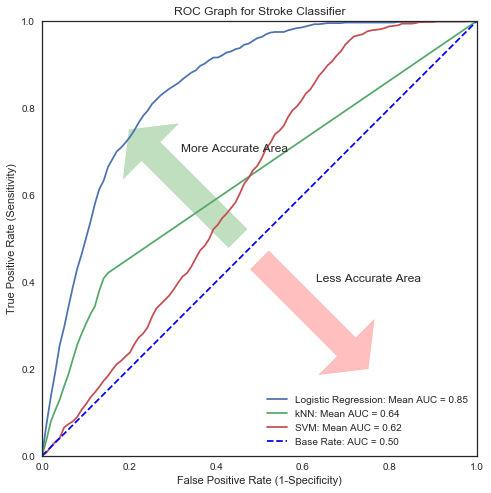

In [66]:
# Merging: PLotting ROC Curves for all classifiers
fig1 = plt.figure(figsize=(8,8))

ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.25))
ax1.add_patch(patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.25))

plt.title('ROC Graph for Stroke Classifier')
plt.plot(mean_fpr_lr, mean_tpr_lr, label='Logistic Regression: Mean AUC = %0.2f' % (mean_auc_lr))
plt.plot(mean_fpr_knn, mean_tpr_knn, label='kNN: Mean AUC = %0.2f' % (mean_auc_knn))
plt.plot(mean_fpr_svc, mean_tpr_svc, label='SVM: Mean AUC = %0.2f' % (mean_auc_svc)) # lw=2, alpha=1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'b--', label='Base Rate: AUC = 0.50') # Plot Base Rate ROC
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')

plt.text(0.32,0.7,'More Accurate Area',fontsize = 12)
plt.text(0.63,0.4,'Less Accurate Area',fontsize = 12)

# plt.grid(True)